### FFT examples for image analysis

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

import copy

In [2]:
img = cv2.imread('./Lenna.png')

In [3]:
img.shape

(512, 512, 3)

In [4]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

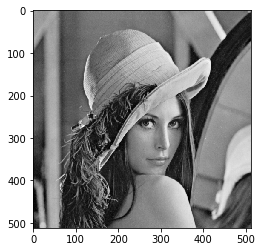

In [5]:
plt.imshow(img, cmap='gray')

In [6]:
f = np.fft.fft2(img)

In [7]:
print(img.shape)
print(f.shape)

(512, 512)
(512, 512)


In [8]:
fshift = np.fft.fftshift(f) #분석을 용이하게 하기 위해 주파수가 0인 부분을 중앙에 위치시킴. 중앙에 저주파가 모이게 됨.

In [9]:
magnitude_spectrum = 20*np.log(np.abs(fshift)) #spectrum 구하는 수학식.

In [10]:
rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2) # 이미지의 중심 좌표

In [11]:
def FFT_removeLF(d_, value):
    d = d_
    fshift = np.fft.fftshift(f) 
    fshift[crow-d:crow+d, ccol-d:ccol+d] = value
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    #threshold를 적용하기 위해 float type을 int type으로 변환
    img_new = np.uint8(img_back);
    ret, thresh = cv2.threshold(img_new,30,255,cv2.THRESH_BINARY_INV)

    plt.subplot(221),plt.imshow(img, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(222),plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title('Spectrum'), plt.xticks([]), plt.yticks([])

    plt.subplot(223),plt.imshow(img_back, cmap = 'gray')
    plt.title('FT'), plt.xticks([]), plt.yticks([])

    plt.subplot(224),plt.imshow(thresh, cmap = 'gray')
    plt.title('Threshold With FT'), plt.xticks([]), plt.yticks([])
    plt.show()

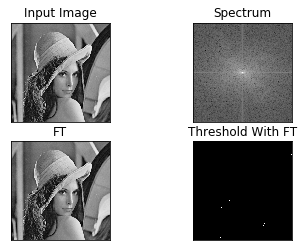

In [12]:
FFT_removeLF(0, 0)

- 저주파 성분 0로 제거하면 edge 성분만 도출

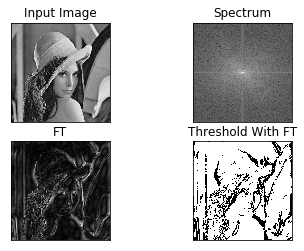

In [13]:
FFT_removeLF(8, 0)

In [14]:
fshift = np.fft.fftshift(f)
fshift[100,100]

(4162.127713958156+120.27034273098366j)

사각형 바깥쪽을 제거하여 고주파 성분 제거

In [15]:
def FFT_removeHF(img, d_, value):    
    d = d_
    
    rows, cols = img.shape
    crow, ccol = int(rows/2), int(cols/2) # 이미지의 중심 좌표
    
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f) 
    
    mask = np.zeros((rows,cols),np.uint8)
    mask[crow-d:crow+d, ccol-d:ccol+d] = 1
    # apply mask and inverse DFT
    fshift = fshift*mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    plt.subplot(121),plt.imshow(img, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
    plt.title('FT'), plt.xticks([]), plt.yticks([])
    plt.show()

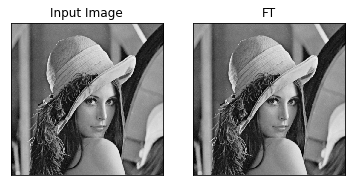

In [16]:
FFT_removeHF(img, 256,1)  #원본 그대로 bypass

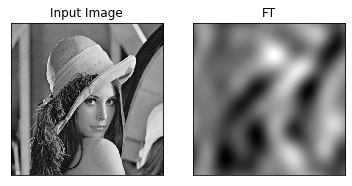

In [17]:
FFT_removeHF(img, 5,1) 

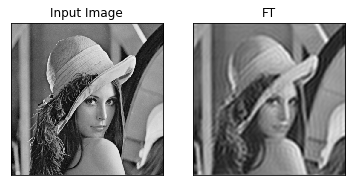

In [18]:
FFT_removeHF(img, 30,1) 

- Blur filters: mean filter, Gaussian filter
- Edge detector: sobel 

In [19]:
mean_filter = np.ones((3,3))

In [20]:
x = cv2.getGaussianKernel(ksize=20,sigma=5)

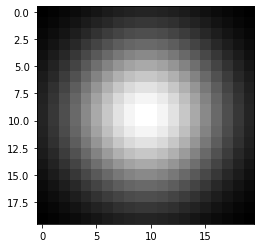

In [21]:
gaussian = x*x.T
plt.imshow(gaussian, cmap='gray')

In [22]:
# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])

In [23]:
filters = [mean_filter, gaussian, sobel_x, sobel_y]
filter_name = ['mean_filter', 'gaussian','sobel_x', 'sobel_y']

In [24]:
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]

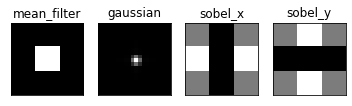

In [25]:
for i in range(4):
    plt.subplot(1,4,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

Indeed, mean, gaussian filters are LPF and sobel is HPF. 

##### Image denoising by FFT

In [26]:
noisy_img = cv2.imread('./noisy_moon.png')

In [27]:
noisy_img = cv2.cvtColor(noisy_img, cv2.COLOR_BGR2GRAY)

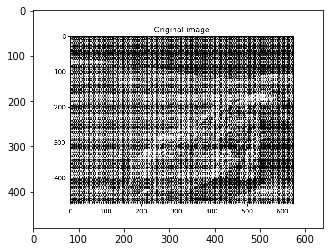

In [28]:
plt.imshow(noisy_img, cmap='gray')

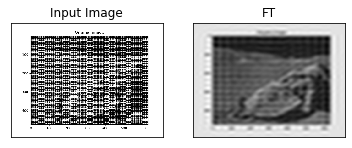

In [29]:
FFT_removeHF(noisy_img,20,1)

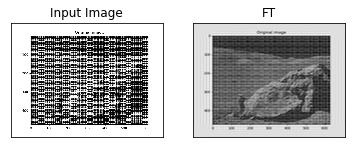

In [30]:
FFT_removeHF(noisy_img,50,1)

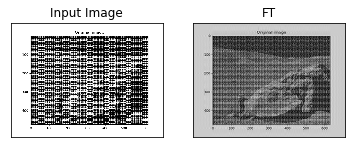

In [31]:
FFT_removeHF(noisy_img,100,1)